[{6.0: 6.0, 7.0: 7.0, 2.0: 2.0, 3.0: 3.0, 4.0: 4.0, 5.0: 5.0, 1.0: 1.0}, {6.0: 0.16413267076694846, 7.0: 0.15979350640898216, 2.0: 0.1757905645497736, 3.0: 0.17584974747474735, 4.0: 0.16651437730304855, 5.0: 0.16468157136709985}, {6.0: 4.2027777777777775, 7.0: 4.469464285714286, 2.0: 4.6875, 3.0: 3.6791666666666663, 4.0: 3.8916666666666666, 5.0: 4.136041666666667}, {2.0: 2.7375, 1.0: 3.1375}, {2.0: 1.9333333333333331, 3.0: 1.5208333333333333, 1.0: 2.2541666666666664}, {2.0: 1.8833333333333333, 3.0: 1.6843750000000002, 4.0: 1.3718750000000002, 1.0: 2.1125}, {2.0: 1.91, 3.0: 1.6695833333333332, 4.0: 1.38375, 5.0: 1.1985416666666666, 1.0: 2.0629166666666663}, {6.0: 1.0585763888888888, 2.0: 1.830625, 3.0: 1.658576388888889, 4.0: 1.4487152777777779, 5.0: 1.229375, 1.0: 1.9388194444444444}, {6.0: 1.0940327380952382, 7.0: 0.9886904761904762, 2.0: 1.8286755952380953, 3.0: 1.6541319444444444, 4.0: 1.4372470238095238, 5.0: 1.240173611111111, 1.0: 1.9015476190476188}, {2.0: 0.00107323232323225, 1

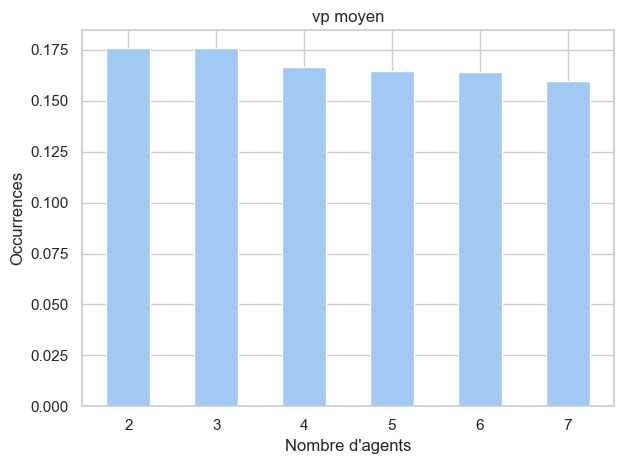

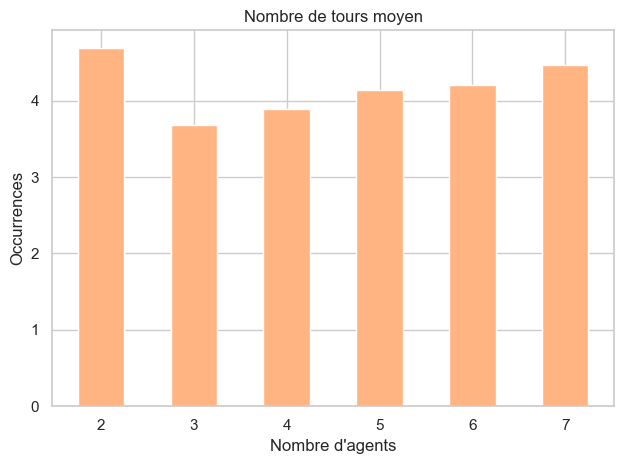

<Figure size 640x480 with 0 Axes>

In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
def est(s):
    try:
        int(s)
        return True
    except ValueError:
        return False
def create_csv_link(dossier):
    # Vérifier si le chemin spécifié est un dossier
    if not os.path.isdir(dossier):
        return "Le chemin spécifié n'est pas un dossier."

    # Initialiser le compteur de fichiers
    nombre_fichiers = 0
    liste_of_df=[]
    # Parcourir tous les éléments du dossier
    for element in os.listdir(dossier):
        chemin_element = os.path.join(dossier, element)
        # Vérifier si l'élément est un fichier
        
        df=pd.read_csv(chemin_element)
        liste_of_df.append(df)

    return liste_of_df

liste_of_df=create_csv_link("csv/csv_UG")

def sommeCSV(liste_of_df):
    lister=[]
    m=0
    for df in liste_of_df :
        
        if(m==0):
            for collone in df :
                lister.append([list(df[collone]),1])
                m=1
                
        else :
            col=0
            for collone in df :
                
                for j in range (len(list(df[collone]))) :
                    
                    if (not np.isnan(df[collone][j])) and lister[col][0][j]!=" nan":
                        lister[col][0][j]=float(lister[col][0][j])+float(df[collone][j])
                              
                lister[col][1]=float(lister[col][1])+1
                col=col+1
   
    new_lister=[]
    
    for i in range(len(lister)):
        semi_list={}
        for j in range(len(lister[i][0])):
            if(est(lister[i][0][j])):
                
                semi_list[float(lister[0][0][j])/lister[0][1]]=(float(lister[i][0][j])/float(lister[i][1]))
                
        new_lister.append(semi_list)
    
    return new_lister

sns.set(style="whitegrid")

def affichage_graph_vp(donnees):
    vp = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(vp), 0.5))
    
    # Choisir une couleur plus agréable
    couleur = sns.color_palette("pastel")[0]
    
    # Créer le graphique à barres
    plt.bar(vp, occurrences, color=couleur, width=largeur_barre)

    # Ajouter des titres et des libellés
    
    plt.xlabel('Nombre d\'agents')
    plt.ylabel('Vp en moyenne')
    plt.xticks(vp)  # Étiquettes sans rotation
    plt.tight_layout()  # Pour une meilleure gestion des espaces
    plt.show()
    plt.clf()

def affichage_graph_turn(donnees):
    vp = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(vp), 0.5))
    
    # Choisir une couleur plus agréable
    couleur = sns.color_palette("pastel")[1]
    
    # Créer le graphique à barres
    plt.bar(vp, occurrences, color=couleur, width=largeur_barre)

    # Ajouter des titres et des libellés
    
    plt.xlabel('Nombre d\'agents')
    plt.ylabel("Nombre de tour en moyenne")
    plt.xticks(vp)  # Étiquettes sans rotation
    plt.tight_layout()  # Pour une meilleure gestion des espaces
    plt.show()
    plt.clf()
    
print(sommeCSV(liste_of_df))
affichage_graph_vp(sommeCSV(liste_of_df)[1])
affichage_graph_turn(sommeCSV(liste_of_df)[2])

4.139722222222223
4.686468253968255
5.075
3.675
4.079166666666667
4.076250000000001
0
4.265833333333333
4.252460317460317
4.3
3.6833333333333327
3.7041666666666666
4.195833333333334
1


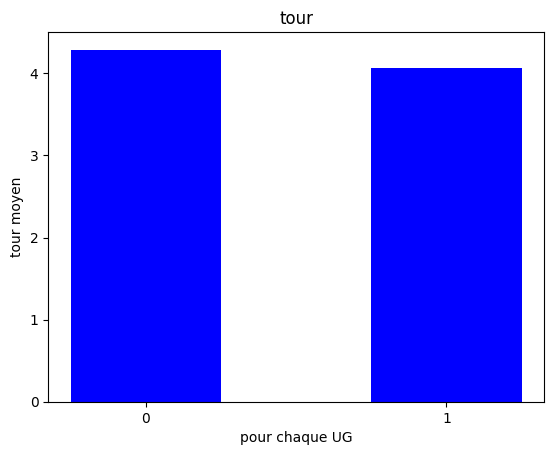

0.1684943015215616
0.1631022393328533
0.1763203329850926
0.1774549062049061
0.1709093903172849
0.1640800679850743
0
0.1597710400123353
0.156484773485111
0.1752607961144546
0.1742445887445886
0.1621193642888122
0.1652830747491254
1


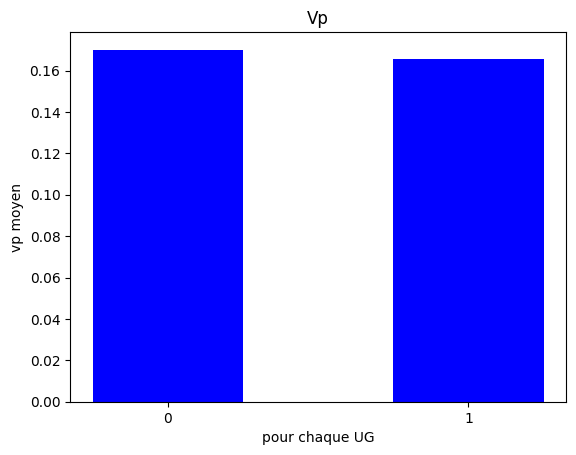

<Figure size 640x480 with 0 Axes>

In [12]:
liste_of_df=create_csv_link("csv/csv_UG")
def affichage_graph_UG(donnees):
    
    vp = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(vp), 0.5)) 
    # Créer le graphique à barres
    plt.bar(vp, occurrences, color='blue',width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('Vp')
    plt.xlabel('pour chaque UG')
    plt.ylabel('vp moyen')
    plt.xticks(vp)
    plt.show()
    plt.clf()
    
def affichage_graph_UG2(donnees):
    
    vp = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(vp), 0.5)) 
    # Créer le graphique à barres
    plt.bar(vp, occurrences, color='blue',width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('tour')
    plt.xlabel('pour chaque UG')
    plt.ylabel('tour moyen')
    plt.xticks(vp)
    plt.show()
    plt.clf()
    
    
def mean_global_vp(list_of_df):
    dic={}
    l=0
        
    for df in list_of_df:
        
        somme=0
        for j in df["vp"]:
            if(not np.isnan(j)):
                print(j)
                somme=somme+float(j)
        dic[l]=somme/6
        print(l)
        l=l+1
    return dic 

def mean_global_turn(list_of_df):
    dic={}
    l=0
        
    for df in list_of_df:
        
        somme=0
        for j in df["tour"]:
            if(not np.isnan(j)):
                print(j)
                somme=somme+float(j)
        dic[l]=somme/6
        print(l)
        l=l+1
    return dic 

affichage_graph_UG2(mean_global_turn(liste_of_df))
affichage_graph_UG(mean_global_vp(liste_of_df))


[['True', '2', '26', '-0.024280067758328625]'], ['True', '1', '10', '0.023809523809523808]'], ['True', '3', '42', '-0.046780281367951496]'], ['True', '1', '10', '-0.031746031746031744]'], ['True', '0', '6', '0.023809523809523808]'], ['False', '2', '8', '0.10104529616724742]'], ['True', '1', '7', '0.0431372549019608]'], ['True', '1', '21', '0.03287165281625118]'], ['True', '2', '36', '-0.04822695035460993]'], ['False', '1', '8', '0.06666666666666668]'], ['True', '2', '19', '-0.03432343234323432]'], ['True', '1', '36', '-0.042118217685597426]'], ['True', '0', '17', '0.033333333333333326]'], ['True', '1', '22', '0.01884057971014494]'], ['False', '4', '6', '0.08888888888888888]'], ['True', '2', '42', '-0.03308270676691728]'], ['True', '3', '38', '-0.04427480916030534]'], ['True', '1', '43', '-0.041979336595976066]'], ['True', '0', '13', '0.018181818181818188]'], ['True', '0', '27', '-0.009694828770483763]'], ['True', '1', '28', '-0.02582644628099172]'], ['True', '1', '17', '-0.001288659793

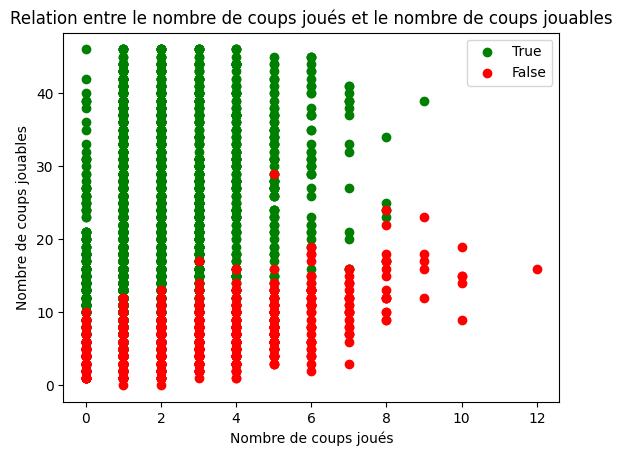

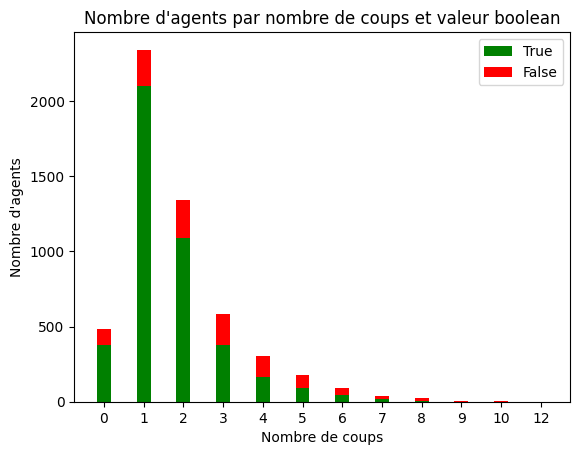

In [13]:
def plot_agents_bar_chart(data):
    # Création d'un dictionnaire pour stocker le nombre d'agents par nombre de coups et valeur boolean
    agent_counts = {}

    for item in data:
        # Récupération du nombre de coups et de la valeur boolean
        coup = int(item[1].strip())
        boolean = item[0]

        # Mise à jour du dictionnaire
        if coup not in agent_counts:
            agent_counts[coup] = {'True': 0, 'False': 0}
        agent_counts[coup][boolean] += 1

    # Préparation des données pour le graphique
    coups = sorted(agent_counts.keys())
    true_counts = [agent_counts[coup]['True'] for coup in coups]
    false_counts = [agent_counts[coup]['False'] for coup in coups]

    # Création du diagramme en barres
    width = 0.35  # Largeur des barres
    fig, ax = plt.subplots()
    ind = np.arange(len(coups))  # Emplacement des barres

    p1 = ax.bar(ind, true_counts, width, color='green', label='True')
    p2 = ax.bar(ind, false_counts, width, color='red', bottom=true_counts, label='False')

    ax.set_xlabel('Nombre de coups')
    ax.set_ylabel("Nombre d'agents")
    ax.set_title('Nombre d\'agents par nombre de coups et valeur boolean')
    ax.set_xticks(ind)
    ax.set_xticklabels(coups)
    ax.legend()

    plt.show()


# Chemin vers le fichier texte où sont enregistrées les données
file_path = "csv/csv_UG_point"

def file_transform(file_path):
    # Lecture des données depuis le fichier texte et stockage dans une liste
   
    liste_of_data=[]
    # Parcourir tous les éléments du dossier
    for element in os.listdir(file_path):
        with open(file_path+"/"+element, "r") as file:
            lines = file.readlines()
        retrieved_data = [line.strip().split() for line in lines]
        for i in retrieved_data :
            liste_of_data.append(i)
            
    return liste_of_data
            
    


data=file_transform(file_path)
print(data)
cleaned_data = [[d[0].strip(), d[1].strip(), d[2].strip()] for d in data]

# Séparer les données en deux listes : une pour les valeurs "True" et une pour les valeurs "False"
true_values = [(int(d[1]), int(d[2])) for d in cleaned_data if d[0] == 'True']
false_values = [(int(d[1]), int(d[2])) for d in cleaned_data if d[0] == 'False']

# Vérifier si les listes sont vides
if true_values:
    true_x, true_y = zip(*true_values)
else:
    true_x, true_y = [], []

if false_values:
    false_x, false_y = zip(*false_values)
else:
    false_x, false_y = [], []

# Créer le graphique
plt.scatter(true_x, true_y, color='green', label='True')
plt.scatter(false_x, false_y, color='red', label='False')

# Ajouter une légende
plt.legend()

# Ajouter des étiquettes
plt.xlabel('Nombre de coups joués')
plt.ylabel('Nombre de coups jouables')

# Afficher le graphique
plt.title('Relation entre le nombre de coups joués et le nombre de coups jouables')
plt.show()

plot_agents_bar_chart(data)



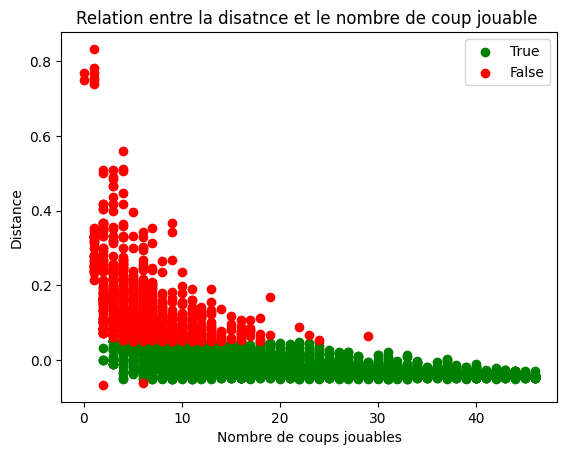

In [14]:
# Nettoyer les espaces dans les données et convertir les valeurs en entiers
cleaned_data = [[d[0].strip(), d[2].strip(), d[3].strip().split("]")[0]] for d in data]

# Séparer les données en deux listes : une pour les valeurs "True" et une pour les valeurs "False"
true_values = [(int(d[1]), float(d[2])) for d in cleaned_data if d[0] == 'True']
false_values = [(int(d[1]), float(d[2])) for d in cleaned_data if d[0] == 'False']

# Vérifier si les listes sont vides
if true_values:
    true_x, true_y = zip(*true_values)
else:
    true_x, true_y = [], []

if false_values:
    false_x, false_y = zip(*false_values)
else:
    false_x, false_y = [], []

# Créer le graphique
plt.scatter(true_x, true_y, color='green', label='True')
plt.scatter(false_x, false_y, color='red', label='False')

# Ajouter une légende
plt.legend()

# Ajouter des étiquettes
plt.xlabel('Nombre de coups jouables')
plt.ylabel('Distance')

# Afficher le graphique
plt.title('Relation entre la disatnce et le nombre de coup jouable ')
plt.show()


[{6.0: 6.0, 7.0: 7.0, 2.0: 2.0, 3.0: 3.0, 4.0: 4.0, 5.0: 5.0, 1.0: 1.0}, {6.0: 0.16413267076694846, 7.0: 0.15979350640898216, 2.0: 0.1757905645497736, 3.0: 0.17584974747474735, 4.0: 0.16651437730304855, 5.0: 0.16468157136709985}, {6.0: 4.2027777777777775, 7.0: 4.469464285714286, 2.0: 4.6875, 3.0: 3.6791666666666663, 4.0: 3.8916666666666666, 5.0: 4.136041666666667}, {2.0: 2.7375, 1.0: 3.1375}, {2.0: 1.9333333333333331, 3.0: 1.5208333333333333, 1.0: 2.2541666666666664}, {2.0: 1.8833333333333333, 3.0: 1.6843750000000002, 4.0: 1.3718750000000002, 1.0: 2.1125}, {2.0: 1.91, 3.0: 1.6695833333333332, 4.0: 1.38375, 5.0: 1.1985416666666666, 1.0: 2.0629166666666663}, {6.0: 1.0585763888888888, 2.0: 1.830625, 3.0: 1.658576388888889, 4.0: 1.4487152777777779, 5.0: 1.229375, 1.0: 1.9388194444444444}, {6.0: 1.0940327380952382, 7.0: 0.9886904761904762, 2.0: 1.8286755952380953, 3.0: 1.6541319444444444, 4.0: 1.4372470238095238, 5.0: 1.240173611111111, 1.0: 1.9015476190476188}, {2.0: 0.00107323232323225, 1

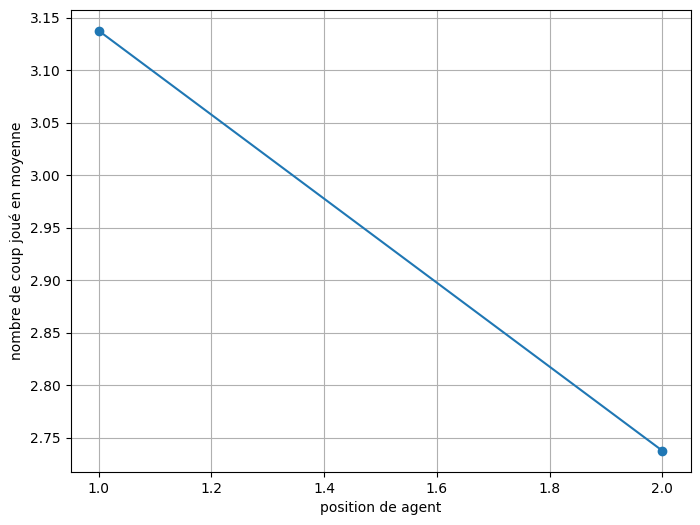

Dictionnaire trié par clés dans l'ordre croissant:
{2.0: 1.9333333333333331, 3.0: 1.5208333333333333, 1.0: 2.2541666666666664}
{1.0: 2.2541666666666664, 2.0: 1.9333333333333331, 3.0: 1.5208333333333333}
[1.0, 2.0, 3.0]
[2.2541666666666664, 1.9333333333333331, 1.5208333333333333]


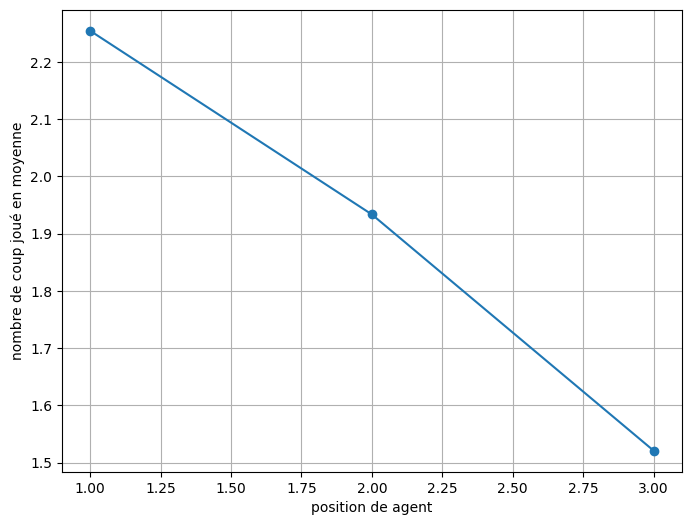

Dictionnaire trié par clés dans l'ordre croissant:
{2.0: 1.8833333333333333, 3.0: 1.6843750000000002, 4.0: 1.3718750000000002, 1.0: 2.1125}
{1.0: 2.1125, 2.0: 1.8833333333333333, 3.0: 1.6843750000000002, 4.0: 1.3718750000000002}
[1.0, 2.0, 3.0, 4.0]
[2.1125, 1.8833333333333333, 1.6843750000000002, 1.3718750000000002]


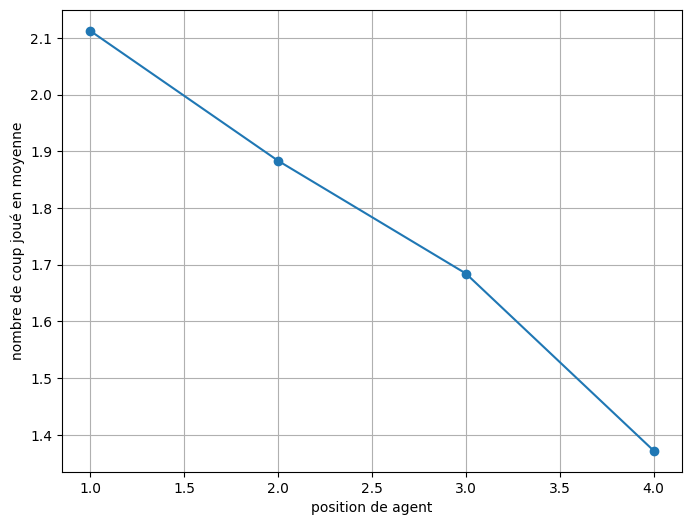

Dictionnaire trié par clés dans l'ordre croissant:
{2.0: 1.91, 3.0: 1.6695833333333332, 4.0: 1.38375, 5.0: 1.1985416666666666, 1.0: 2.0629166666666663}
{1.0: 2.0629166666666663, 2.0: 1.91, 3.0: 1.6695833333333332, 4.0: 1.38375, 5.0: 1.1985416666666666}
[1.0, 2.0, 3.0, 4.0, 5.0]
[2.0629166666666663, 1.91, 1.6695833333333332, 1.38375, 1.1985416666666666]


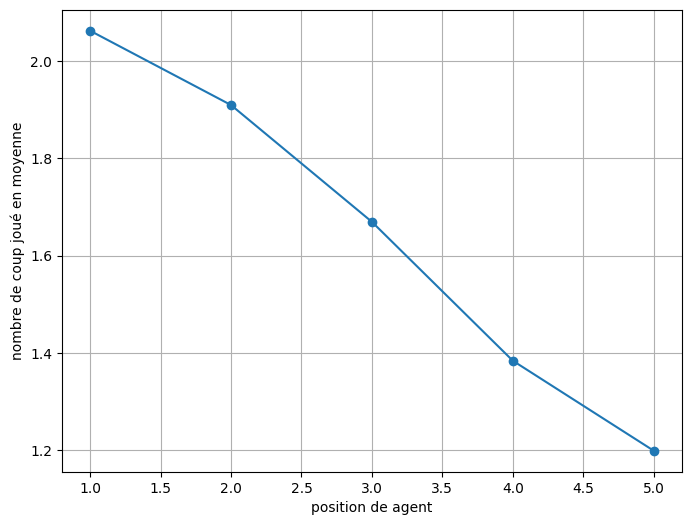

Dictionnaire trié par clés dans l'ordre croissant:
{6.0: 1.0585763888888888, 2.0: 1.830625, 3.0: 1.658576388888889, 4.0: 1.4487152777777779, 5.0: 1.229375, 1.0: 1.9388194444444444}
{1.0: 1.9388194444444444, 2.0: 1.830625, 3.0: 1.658576388888889, 4.0: 1.4487152777777779, 5.0: 1.229375, 6.0: 1.0585763888888888}
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
[1.9388194444444444, 1.830625, 1.658576388888889, 1.4487152777777779, 1.229375, 1.0585763888888888]


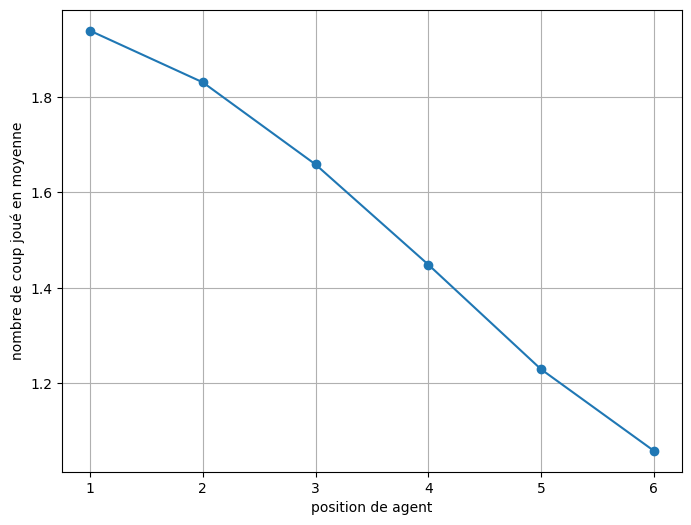

Dictionnaire trié par clés dans l'ordre croissant:
{6.0: 1.0940327380952382, 7.0: 0.9886904761904762, 2.0: 1.8286755952380953, 3.0: 1.6541319444444444, 4.0: 1.4372470238095238, 5.0: 1.240173611111111, 1.0: 1.9015476190476188}
{1.0: 1.9015476190476188, 2.0: 1.8286755952380953, 3.0: 1.6541319444444444, 4.0: 1.4372470238095238, 5.0: 1.240173611111111, 6.0: 1.0940327380952382, 7.0: 0.9886904761904762}
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
[1.9015476190476188, 1.8286755952380953, 1.6541319444444444, 1.4372470238095238, 1.240173611111111, 1.0940327380952382, 0.9886904761904762]


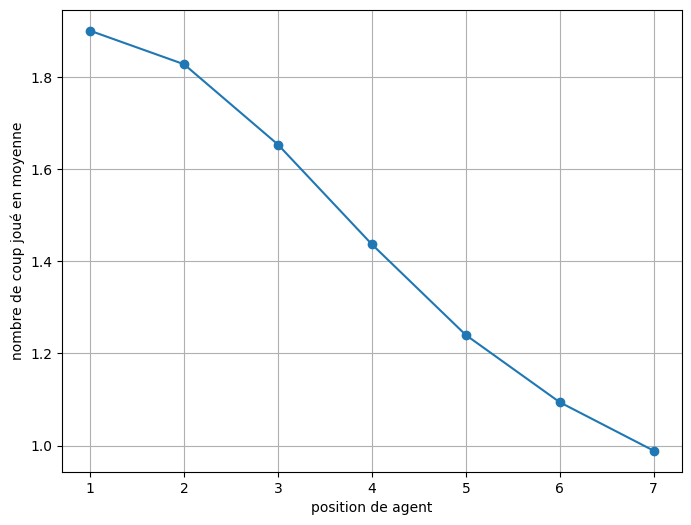

{6.0: 1.0940327380952382, 7.0: 0.9886904761904762, 2.0: 1.8286755952380953, 3.0: 1.6541319444444444, 4.0: 1.4372470238095238, 5.0: 1.240173611111111, 1.0: 1.9015476190476188}
Dictionnaire trié par clés dans l'ordre croissant:
{2.0: 2.7375, 1.0: 3.1375}
{1.0: 3.1375, 2.0: 2.7375}
Dictionnaire trié par clés dans l'ordre croissant:
{2.0: 1.9333333333333331, 3.0: 1.5208333333333333, 1.0: 2.2541666666666664}
{1.0: 2.2541666666666664, 2.0: 1.9333333333333331, 3.0: 1.5208333333333333}
Dictionnaire trié par clés dans l'ordre croissant:
{2.0: 1.8833333333333333, 3.0: 1.6843750000000002, 4.0: 1.3718750000000002, 1.0: 2.1125}
{1.0: 2.1125, 2.0: 1.8833333333333333, 3.0: 1.6843750000000002, 4.0: 1.3718750000000002}
Dictionnaire trié par clés dans l'ordre croissant:
{2.0: 1.91, 3.0: 1.6695833333333332, 4.0: 1.38375, 5.0: 1.1985416666666666, 1.0: 2.0629166666666663}
{1.0: 2.0629166666666663, 2.0: 1.91, 3.0: 1.6695833333333332, 4.0: 1.38375, 5.0: 1.1985416666666666}
Dictionnaire trié par clés dans l'o

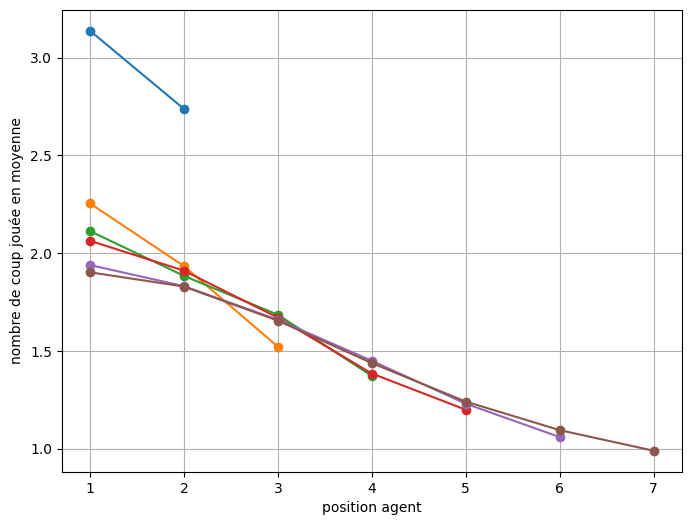

Dictionnaire trié par clés dans l'ordre croissant:
{2.0: 0.00107323232323225, 1.0: 0.0008695652173912501}
{1.0: 0.0008695652173912501, 2.0: 0.00107323232323225}
Dictionnaire trié par clés dans l'ordre croissant:
{2.0: 0.0002771812614332, 3.0: 0.00024499193616835, 1.0: 0.0007465277777777}
{1.0: 0.0007465277777777, 2.0: 0.0002771812614332, 3.0: 0.00024499193616835}
Dictionnaire trié par clés dans l'ordre croissant:
{2.0: 0.00016385711619471848, 3.0: 0.0001605956639170529, 4.0: 4.26369304293281e-05, 1.0: 3.387511611195826e-05}
{1.0: 3.387511611195826e-05, 2.0: 0.00016385711619471848, 3.0: 0.0001605956639170529, 4.0: 4.26369304293281e-05}
Dictionnaire trié par clés dans l'ordre croissant:
{2.0: 4.676359144974724e-05, 3.0: 6.295110900374058e-05, 4.0: 1.3970334316785313e-05, 5.0: 1.590821250263975e-05, 1.0: 3.259309591546434e-05}
{1.0: 3.259309591546434e-05, 2.0: 4.676359144974724e-05, 3.0: 6.295110900374058e-05, 4.0: 1.3970334316785313e-05, 5.0: 1.590821250263975e-05}
Dictionnaire trié par 

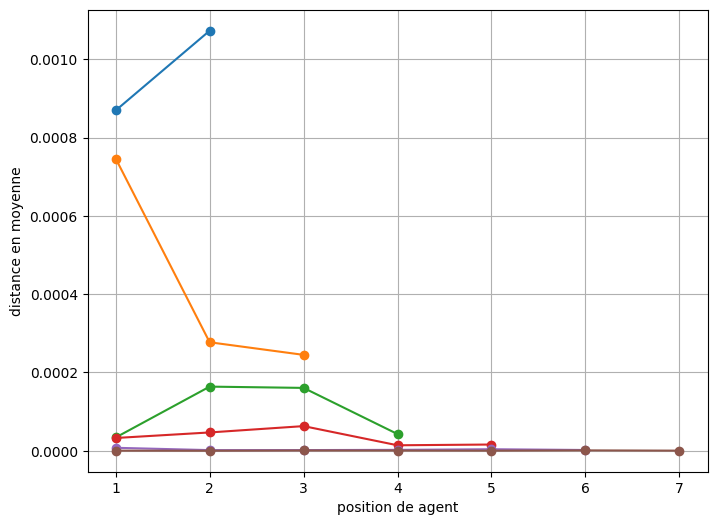

In [15]:
def afficher_graphique(dictionnaire):
    # Extraire les clés et les valeurs du dictionnaire
    
    # Tri des clés dans l'ordre croissant
    cles_triees = sorted(dictionnaire.keys())

    # Création du nouveau dictionnaire trié
    dictionnaire_trie = {}
    for cle in cles_triees:
        dictionnaire_trie[cle] = dictionnaire[cle]

    # Affichage du dictionnaire trié
    print("Dictionnaire trié par clés dans l'ordre croissant:")
    print(dictionnaire)
    print(dictionnaire_trie)
    cles = list(dictionnaire_trie.keys())
    valeurs = list(dictionnaire_trie.values())
    print(cles)
    print(valeurs)
    # Créer le graphique
    plt.figure(figsize=(8, 6))
    plt.plot(cles, valeurs, marker='o')
    
    # Ajouter des étiquettes et un titre
    plt.xlabel('position de agent')
    plt.ylabel('nombre de coup joué en moyenne')
    plt.title('')
    
    # Afficher le graphique
    plt.grid(True)
    plt.show()
def afficher_graphique_all_graph2(liste_of_df):
    
    plt.figure(figsize=(8, 6))
    for i in range(3,9):
        dictionnaire = sommeCSV(liste_of_df)[i]
         # Extraire les clés et les valeurs du dictionnaire
    
        # Tri des clés dans l'ordre croissant
        cles_triees = sorted(dictionnaire.keys())

        # Création du nouveau dictionnaire trié
        dictionnaire_trie = {}
        for cle in cles_triees:
            dictionnaire_trie[cle] = dictionnaire[cle]

        # Affichage du dictionnaire trié
        print("Dictionnaire trié par clés dans l'ordre croissant:")
        print(dictionnaire)
        print(dictionnaire_trie)
        cles = list(dictionnaire_trie.keys())
        valeurs = list(dictionnaire_trie.values())
            
        plt.plot(cles, valeurs, marker='o', linestyle='-')
    
    # Ajouter des étiquettes et un titre
    plt.xlabel('position agent')
    plt.ylabel('nombre de coup jouée en moyenne')
    plt.title('')
    
    # Afficher le graphique
    plt.grid(True)
    plt.show()

def afficher_graphique_all_graph3(liste_of_df):
    
    plt.figure(figsize=(8, 6))
    for i in range(9,15):
        dictionnaire = sommeCSV(liste_of_df)[i]
         # Extraire les clés et les valeurs du dictionnaire
    
        # Tri des clés dans l'ordre croissant
        cles_triees = sorted(dictionnaire.keys())

        # Création du nouveau dictionnaire trié
        dictionnaire_trie = {}
        for cle in cles_triees:
            dictionnaire_trie[cle] = dictionnaire[cle]

        # Affichage du dictionnaire trié
        print("Dictionnaire trié par clés dans l'ordre croissant:")
        print(dictionnaire)
        print(dictionnaire_trie)
        cles = list(dictionnaire_trie.keys())
        valeurs = list(dictionnaire_trie.values())
            
        plt.plot(cles, valeurs, marker='o', linestyle='-')
    
    # Ajouter des étiquettes et un titre
    plt.xlabel('position de agent')
    plt.ylabel('distance en moyenne')
    plt.title('')
    
    # Afficher le graphique
    plt.grid(True)
    plt.show()
print(sommeCSV(liste_of_df))
for i in range(3,9):
    afficher_graphique(sommeCSV(liste_of_df)[i])
print(sommeCSV(liste_of_df)[8])
afficher_graphique_all_graph2(liste_of_df)
afficher_graphique_all_graph3(liste_of_df)